# Exploratory Data Analysis (EDA)
## Chest X-ray Classification Dataset

This notebook explores the processed dataset before training.

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Dataset Statistics

In [2]:
# Count images in each split and class
data_dir = Path('../data/processed')
classes = ['Normal', 'Pneumonia', 'COVID', 'Tuberculosis', 'Pneumothorax']
splits = ['train', 'val', 'test']

stats = {}
for split in splits:
    stats[split] = {}
    for cls in classes:
        cls_dir = data_dir / split / cls
        if cls_dir.exists():
            count = len(list(cls_dir.glob('*.png')))
            stats[split][cls] = count
        else:
            stats[split][cls] = 0

# Display statistics
import pandas as pd
df_stats = pd.DataFrame(stats).T
df_stats['Total'] = df_stats.sum(axis=1)
print("Dataset Statistics:")
print(df_stats)

Dataset Statistics:
       Normal  Pneumonia  COVID  Tuberculosis  Pneumothorax  Total
train    6195       4208   2531          1745          1868  16547
val      1328        902    542           374           400   3546
test     1328        902    543           375           401   3549


## 2. Class Distribution

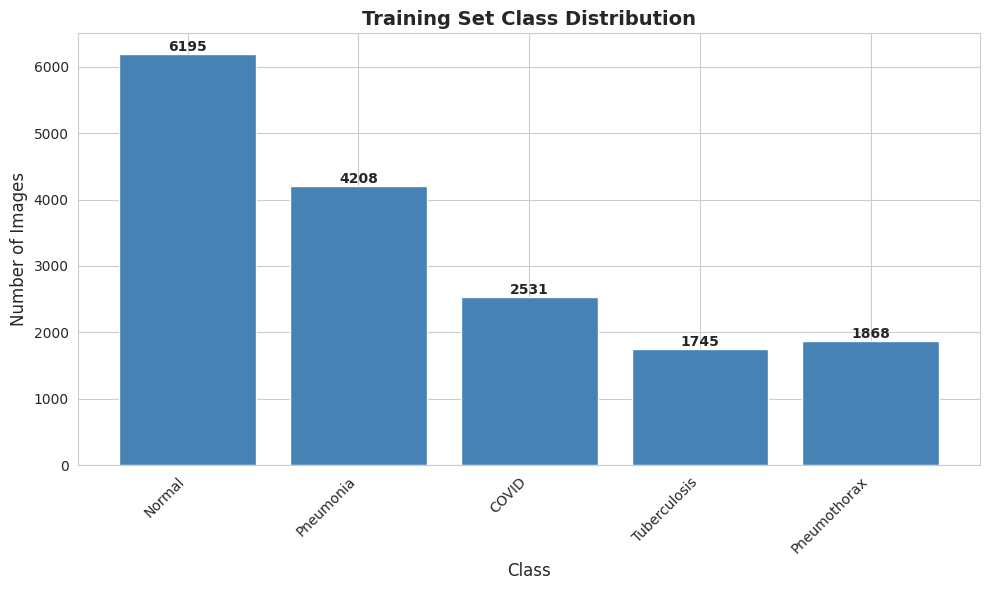

In [3]:
# Plot class distribution for training set
train_counts = df_stats.loc['train', classes]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(classes, train_counts, color='steelblue')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Number of Images', fontsize=12)
ax.set_title('Training Set Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Sample Images

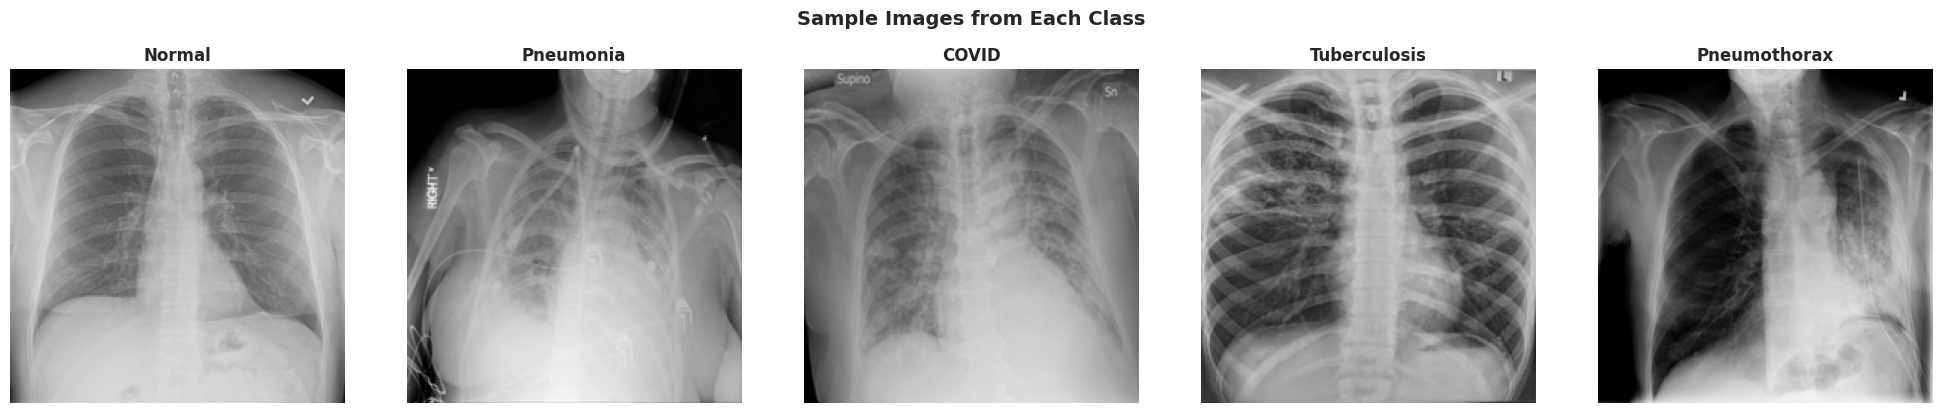

In [4]:
# Display sample images from each class
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, cls in enumerate(classes):
    cls_dir = data_dir / 'train' / cls
    images = list(cls_dir.glob('*.png'))
    
    if images:
        img_path = images[0]
        img = Image.open(img_path)
        
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(cls, fontsize=12, fontweight='bold')
        axes[i].axis('off')

plt.suptitle('Sample Images from Each Class', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 4. Image Size Analysis

In [5]:
# Check if all images are the same size
sample_images = []
for cls in classes:
    cls_dir = data_dir / 'train' / cls
    images = list(cls_dir.glob('*.png'))[:5]  # Sample 5 images per class
    sample_images.extend(images)

sizes = [Image.open(img).size for img in sample_images]
unique_sizes = set(sizes)

print(f"Unique image sizes: {unique_sizes}")
print(f"All images same size: {len(unique_sizes) == 1}")

Unique image sizes: {(224, 224)}
All images same size: True


## 5. Class Imbalance Ratio

In [6]:
# Calculate class weights (inverse frequency)
train_total = train_counts.sum()
class_weights = train_total / (len(classes) * train_counts)

print("Class Weights for Weighted Loss:")
for cls, weight in zip(classes, class_weights):
    print(f"  {cls:15s}: {weight:.4f}")

Class Weights for Weighted Loss:
  Normal         : 0.5342
  Pneumonia      : 0.7865
  COVID          : 1.3075
  Tuberculosis   : 1.8965
  Pneumothorax   : 1.7716
